In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from scipy import signal
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
# from pmdarima.arima.utils import ndiffs
# from pmdarima.arima import auto_arima
# from pmdarima.arima import ADFTest
# from pmdarima import acf
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown
from IPython.display import Math
import datetime
import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueError)

In [39]:
df = pd.read_csv("C:/Users/norri/Desktop/energy_prediction.csv",
                 parse_dates=['DATE'])
# df_test = pd.read_csv('G:/My Drive/IN/Data/Data_Standard/kind_forecast_test.csv',
#                  parse_dates=['ds'])
# dates = pd.read_csv('G:/My Drive/IN/Data/Forecast_Comparisons/dates.csv',
#                       parse_dates=['Date'])
# df = df.rename(columns={'ds': 'week', 'y': 'sales'})
# df_test = df_test.rename(columns={'ds': 'week', 'y': 'sales'})

In [ ]:
# df = df.drop_duplicates(subset=['sales', 'week'])
# df['week'] = df['week'] = pd.to_datetime(df['week'])
# df = df.sort_values(by=['week'])
# df['sales'] = df['sales'].values
# df['index'] = df['week']
# df.set_index('index', inplace=True)
# df = df[['week','sales']]

The following metrics are excellent in different situations; for example, RMSE is
excellent for comparing similar models.

In [40]:
def forecast_accuracy(forecast, Actuals):
    mape = np.mean(np.abs(forecast - Actuals)/np.abs(Actuals))  # MAPE
    mae = np.mean(np.abs(forecast - Actuals))    # MAE
    mse = np.square(np.subtract(Actuals,forecast)).mean()
    rmse = np.mean((forecast - Actuals)**2)**.5  # RMSE
    smape = 1/len(Actuals) * np.sum(2 * np.abs(forecast-Actuals) / (np.abs(Actuals) + np.abs(forecast))*100)
    return({'MAPE':mape, 'MSE':mse, 'MAE':mae, 'RMSE':rmse, 'SMAPE':smape})

There are three parameters of interest for an ARIMA model: d,p, and q. D refers to
differencing each previous value to make the model stationary. P is the term used
for how many lags can be used for prediction. Q is the order of moving average
to improve the model.

In [41]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Sales', dpi=100):
    plt.figure(figsize=(12, 4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, df['DATE'], df['revenue'], title='Sales Over Time')

KeyError: 'revenue'

Now taking a look at the other predictions compared to actuals.

In [14]:
# df_group = pd.read_csv('C:/Users/norri/Desktop/GCP/BQ_FOLDER/JMS_GCP_Predicted_Plot.csv', parse_dates=True)
# df_group.astype(float)
# df_group['actuals'] = test.values

ValueError: could not convert string to float: '8/20/2023'

In [42]:
# df.astype(float)
# df['actuals'] = test.values
df_8_week = forecast_accuracy(df['Predicted_Usage'], df['Actual_Usage'])
df_12_week = forecast_accuracy(df['forecast_12'], df['revenue'])
df_12_week_update = forecast_accuracy(df['forecast_12_new'], df['revenue'])
# Prophet = forecast_accuracy(df_group['Prophet'], df_group['actuals'])
# Forecast = forecast_accuracy(df_group['Amazon_Forecast'], df_group['actuals'])
# error_frame = pd.DataFrame.from_dict(VertexAI, orient='index')
# error_frame[2] = pd.DataFrame.from_dict(BigQuery, orient='index')
# error_frame[3] = pd.DataFrame.from_dict(NeuralProphet, orient='index')
# error_frame[4] = pd.DataFrame.from_dict(Prophet, orient='index')
# error_frame[5] = pd.DataFrame.from_dict(Forecast, orient='index')
# error_frame = error_frame.set_axis(['VertexAI', 'BigQuery', 'NeuralProphet',
#                                     'Prophet', 'Amazon_Forecast'], axis=1, inplace=False)

KeyError: 'forecast_12'

In [ ]:
df = forecast_accuracy(df_group['BigQuery'], df_group['actuals'])
VertexAI = forecast_accuracy(df_group['VertexAI'], df_group['actuals'])
NeuralProphet = forecast_accuracy(df_group['NeuralProphet'], df_group['actuals'])
Prophet = forecast_accuracy(df_group['Prophet'], df_group['actuals'])
Forecast = forecast_accuracy(df_group['Amazon_Forecast'], df_group['actuals'])

In [ ]:
error_frame = pd.DataFrame.from_dict(VertexAI, orient='index')
error_frame[2] = pd.DataFrame.from_dict(BigQuery, orient='index')
error_frame[3] = pd.DataFrame.from_dict(NeuralProphet, orient='index')
error_frame[4] = pd.DataFrame.from_dict(Prophet, orient='index')
error_frame[5] = pd.DataFrame.from_dict(Forecast, orient='index')
error_frame = error_frame.set_axis(['VertexAI', 'BigQuery', 'NeuralProphet',
                                    'Prophet', 'Amazon_Forecast'], axis=1, inplace=False)

In [ ]:
x = df_group.index
Actuals = df_temp.squeeze()
VertexAI = df_group['VertexAI']
BigQuery = df_group['BigQuery']
NeuralProphet = df_group['NeuralProphet']
Forecast = df_group['Amazon_Forecast']
Prophet = df_group['Prophet']
NoPrime = df_group['NoPrime']

In [ ]:
x = df.index
fig = plt.figure(figsize=(17, 8))
ax  = fig.add_subplot(111)
# ax.plot(x, Actuals, c='b', label='Actuals', linewidth=7)
ax.plot(x, revenue, c='r', linestyle='dashed',  label='VertexAI')
ax.plot(x, BigQuery, c='g', linestyle='dashed', label='BigQuery')
ax.plot(x, NeuralProphet, c='y', linestyle='dashed', label='NeuralProphet')
ax.plot(x, Forecast, c='c', linestyle='dashed', label='Amazon Forecast')
ax.plot(x, Prophet, c='m', linestyle='dashed', label='Prophet')
ax.plot(x, NoPrime, color = '0.1', linestyle='dashed', label='NoPrime')
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='large')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.title('Forecast Method Comparison')
plt.show()

In [ ]:
fig = plt.figure(figsize=(17, 8))
ax  = fig.add_subplot(111)
ax.plot(x, Actuals, c='b', label='Actuals', linewidth=7)
ax.plot(x, VertexAI, c='r', linestyle='dashed',  label='VertexAI')
ax.plot(x, BigQuery, c='g', linestyle='dashed', label='BigQuery')
ax.plot(x, NeuralProphet, c='y', linestyle='dashed', label='NeuralProphet')
ax.plot(x, Forecast, c='c', linestyle='dashed', label='Amazon Forecast')
ax.plot(x, Prophet, c='m', linestyle='dashed', label='Prophet')
ax.plot(x, NoPrime, color = 'w', linestyle='dashed', label='NoPrime')
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='large')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.title('Forecast Method Comparison')
plt.show()

Note that it's better to run this section only once, or the numbers will continue to double. I made a scalar for Prime Day by dividing the five highest sales day by the mean of all sales days. The division of the actual Prime Day by the scalar is what provides the value for the NoPrime value on Prime Day.


In [ ]:
scalar = np.mean(df['sales'].nlargest(n=5)) / np.mean(df['sales'])
BigQuery_Prime = BigQuery
swap = BigQuery_Prime[14::2].values
BigQuery_Prime[14::2] = BigQuery_Prime[14::2] + swap
print(BigQuery_Prime[14::2])

The blue line, actuals are overlaid by a white dashed line, which is just the duplicated actuals with the scalar minimizing Prime Day.

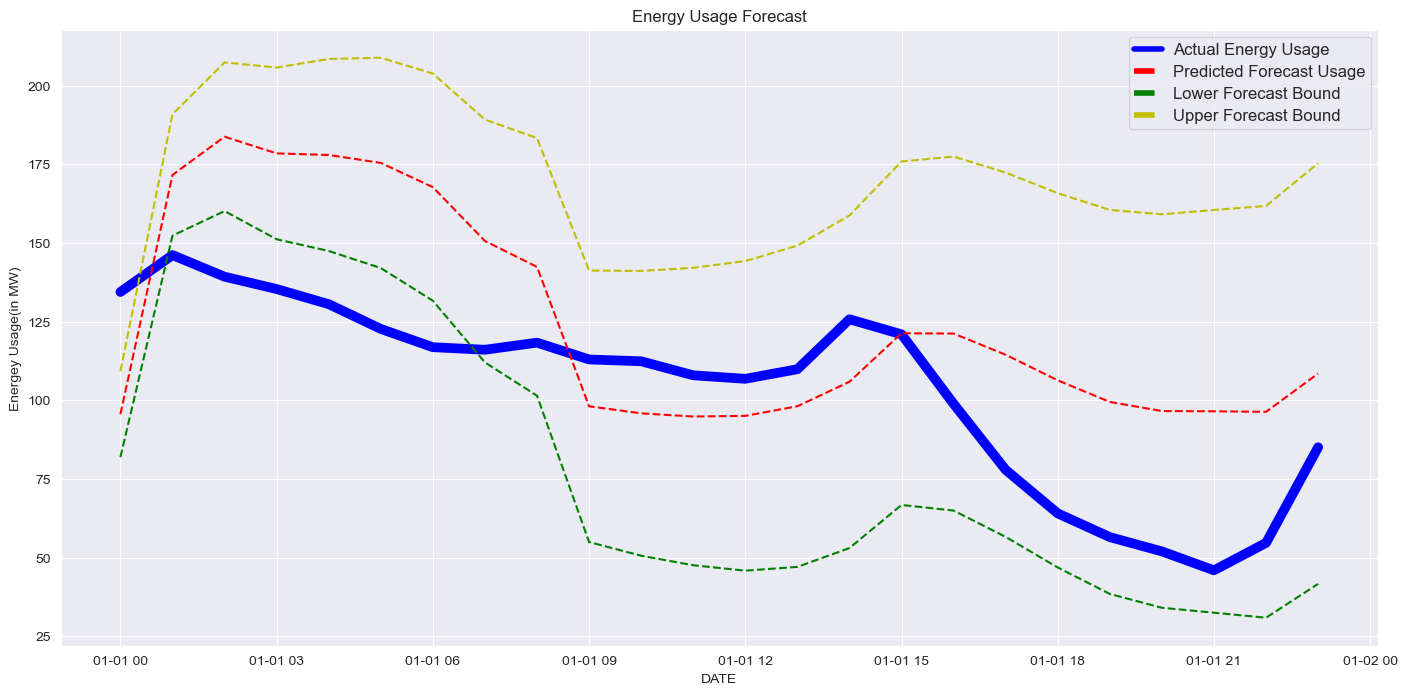

In [44]:
x = df['DATE']
fig = plt.figure(figsize=(17, 8))
ax  = fig.add_subplot(111)
ax.plot(x, df['Actual_Usage'], c='b', label='Actual Energy Usage', linewidth=7)
ax.plot(x, df['Predicted_Usage'], c='r', linestyle='dashed',  label='Predicted Forecast Usage')
ax.plot(x, df['Lower_Bound'], c='g', linestyle='dashed', label='Lower Forecast Bound')
ax.plot(x, df['Upper_Bound'], c='y', linestyle='dashed', label='Upper Forecast Bound')
# ax.plot(x, Forecast, c='c', linestyle='dashed', label='Amazon Forecast')
# ax.plot(x, Prophet, c='m', linestyle='dashed', label='Prophet')
# ax.plot(x, NoPrime, color='.01', linestyle='dashed', label='NoPrime')
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='large')
plt.xlabel('DATE')
plt.ylabel('Energey Usage(in MW)')
plt.title('Energy Usage Forecast')
plt.show()

The spike in the BigQuery_Prime comes from being multiplied by the scalar above.

In [ ]:
dataframe = pd.DataFrame(error_frame)
dataframe.style.highlight_min(axis=1, color= 'blue')

Just for some extra clarity, Amazon performed the best in MAPE, then BigQuery, then
Prophet, then VertexAI, and finally NeuralProphet.
For MSE, the order was the same.
For MAE. the only switchup was VertexAI and Prophet, which took 3 and 4th, respectively.
Finally, RMSE matched the order of the first two metrics.

To see how these metrics are cacaluated, see this article on MAPE:
https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

This on MSE: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

This on MAE: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error

Finally, we have RMSE (also known as RMS) documented here (Note: FB uses normalized
RMSE for their ML):
https://en.wikipedia.org/wiki/Root-mean-square_deviation

I would look at this article to make up your mind on pros and cons of each:
https://towardsdatascience.com/forecast-kpi-rmse-mae-mape-bias-cdc5703d242d

But I will point out some of the largest differences. For MAPE, or Mean Absolute
Percentage Error, the average error in low-demand periods have a disproporitionaly
large effect durring high-demand season.

MAE, or Mean Absolute Error, simply takes the absolute value of the difference between
the prediciton and actual observations, then averages them. It does suffer from scaling
issues, so it is often weighted appropriately.

Both MAE and MAPE are very similar: MAPE is an easier to understand metric, while MAE
is easier to understand at scale. Also, MAPE behaves poorly at zero.

Root-mean-square-deviation is, in its simplest case, with an unbiased estimator, the
same as the standard deviation. For ML purposes, minimizing RMSE is the best way to
compare one model to another.

##### Remember that this numbers do not exist in a vacuum; they are best at comparing one
##### model to another. Comparing RMSE and MAPE might be the first step, as one is
##### constrained and RMSE less so. Finally, none of these should be negative, or else
##### the model needs to be re-examined.

In [ ]:
kind_weekly = pd.read_csv('G:/My Drive/IN/Data/Forecast_Comparisons/kind_weekly_final_forecast.csv',
                       index_col="Date",parse_dates=True)
kind_daily = pd.read_csv('G:/My Drive/IN/Data/Forecast_Comparisons/kind_daily_cleaned_final_forecast.csv',
                          index_col="Date",parse_dates=True)
eo = pd.read_csv('G:/My Drive/IN/Data/Forecast_Comparisons/eo_final_forecast.csv',
                          index_col="Date",parse_dates=True)
biobag = pd.read_csv('G:/My Drive/IN/Data/Forecast_Comparisons/biobag_final_forecast.csv',
                          index_col="Date",parse_dates=True)
tyson = pd.read_csv('G:/My Drive/IN/Data/Forecast_Comparisons/tyson_final_forecast.csv',
                          index_col="Date",parse_dates=True)
print('Kind Weekly')
print(forecast_accuracy(kind_weekly['Forecast'].astype(float), kind_weekly['Actuals'].astype(float)))
print('Kind Daily')
print(forecast_accuracy(kind_daily['Forecast'].astype(float), kind_daily['Actuals'].astype(float)))
print('EO')
print(forecast_accuracy(eo['Forecast'].astype(float), eo['Actuals'].astype(float)))
print('biobag')
print(forecast_accuracy(biobag['Forecast'].astype(float), biobag['Actuals'].astype(float)))
print('Tyson')
print(forecast_accuracy(tyson['Forecast'].astype(float), tyson['Actuals'].astype(float)))

MAPE: Good scores are under 20%, OK between 20% and 50%, and >50% are not good.
MSE: While there is no one good value, the closer to 0 the better.
MAE: Similar to MSE, the lower the MAE the better.
RMSE: Useful for comparing ML, a lower RMSE score predicts better performance.
SMAPE: Very useful for comparing models and a score under 10 usually suggests the model is decent, anything above 20 means the model is typically bad.

EO, biobag, and Kind Daily have the benefit of multiple smaller observations, which can shrink some of these stats a bit.
Kind Daily was missing about half its values, which also allowed it to have smaller MAPE and SMAPE values. The Kind Weekly
data generally performs pretty well, but the Tyson data, while it has improved lately, still needs work.

In [ ]:
x = kind_weekly.index
fig = plt.figure(figsize=(17, 8))
ax  = fig.add_subplot(111)
ax.plot(x, kind_weekly['Actuals'], c='b', label='Actuals', linewidth=7)
ax.plot(x, kind_weekly['Forecast'], c='r', linestyle='dashed',  label='Forecast')
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='large')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.title('Weekly Kind Forecast')
plt.show()

In [ ]:
x = kind_daily.index
fig = plt.figure(figsize=(17, 8))
ax  = fig.add_subplot(111)
ax.plot(x, kind_daily['Actuals'], c='b', label='Actuals', linewidth=7)
ax.plot(x, kind_daily['Forecast'], c='r', linestyle='dashed',  label='Forecast')
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='large')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.title('Daily Kind Forecast')
plt.show()

In [ ]:
x = eo.index
fig = plt.figure(figsize=(17, 8))
ax  = fig.add_subplot(111)
ax.plot(x, eo['Actuals'], c='b', label='Actuals', linewidth=7)
ax.plot(x, eo['Forecast'], c='r', linestyle='dashed',  label='Forecast')
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='large')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.title('EO Forecast')
plt.show()

In [ ]:
x = biobag.index
fig = plt.figure(figsize=(17, 8))
ax  = fig.add_subplot(111)
ax.plot(x, biobag['Actuals'], c='b', label='Actuals', linewidth=7)
ax.plot(x, biobag['Forecast'], c='r', linestyle='dashed',  label='Forecast')
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='large')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.title('Biobag Forecast')
plt.show()

In [ ]:
x = tyson.index
fig = plt.figure(figsize=(17, 8))
ax  = fig.add_subplot(111)
ax.plot(x, tyson['Actuals'], c='b', label='Actuals', linewidth=7)
ax.plot(x, tyson['Forecast'], c='r', linestyle='dashed',  label='Forecast')
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='large')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.title('Tyson Forecast')
plt.show()